Importando bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Conhecendo os dados

In [ ]:
#Carregando o dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('car_sales_data.csv')

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [ ]:
#Verificando os dados

print(f"Valor de linhas: {df.shape[0]}")
print(f"Valor de colunas: {df.shape[1]}")

Valor de linhas: 50000
Valor de colunas: 8


In [ ]:
print(df.columns.tolist())

['Manufacturer', 'Model', 'Engine size', 'Fuel type', 'Year of manufacture', 'Mileage', 'Price']


In [ ]:
#Verificando se existem valores nulos
valores_nulos = df.isnull().sum()
print(valores_nulos)

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64


In [ ]:
#Resumo estatistico simples
df.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [ ]:
#Valores zerados em colunas numericas
df[['Price', 'Mileage', 'Year of manufacture', 'Engine size']].eq(0).sum()

,0
Price,0
Mileage,0
Year of manufacture,0
Engine size,0


In [ ]:
#Verificar qual a maior incidencia de fabricante no nosso dataset
df['Manufacturer'].value_counts()

,count
Manufacturer,
Ford,14959
VW,14913
Toyota,12554
BMW,4965
Porsche,2609


In [ ]:
#Verificando a media de por carro em cada fabricante
df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)

,Price
Manufacturer,
Porsche,29103.764661
BMW,24429.459215
Toyota,14340.362275
Ford,10672.288723
VW,10363.139274


In [ ]:
# Verificando o valor total que cada marca vendeu
df.groupby('Manufacturer')['Price'].sum().sort_values(ascending=False)

,Price
Manufacturer,
Toyota,180028908
Ford,159646767
VW,154545496
BMW,121292265
Porsche,75931722


In [ ]:
# Resumo detalhado do preco de cada fabricante
df.groupby('Manufacturer')['Price'].describe()


,count,mean,std,min,25%,50%,75%,max
Manufacturer,,,,,,,,
BMW,4965.0,24429.459215,27901.217685,167.0,5318.00,14384.0,33592.00,168081.0
Ford,14959.0,10672.288723,10615.978148,85.0,2626.00,6646.0,15706.50,62748.0
Porsche,2609.0,29103.764661,28645.943628,266.0,7039.00,18441.0,43712.00,167774.0
Toyota,12554.0,14340.362275,14706.876784,176.0,3373.25,8802.0,20918.25,86353.0
VW,14913.0,10363.139274,10266.181643,76.0,2584.00,6428.0,15214.00,58588.0


In [ ]:
# Verificar a media do ano de carro por marca
df.groupby('Manufacturer')['Year of manufacture'].mean().sort_values(ascending=False)

,Year of manufacture
Manufacturer,
Porsche,2004.562284
Toyota,2004.316951
Ford,2004.196671
VW,2004.123718
BMW,2004.048137


In [ ]:
# Verificar o ano com mais carros vendidos
df['Year of manufacture'].value_counts()

,count
Year of manufacture,
2018,1646
1995,1616
2016,1587
2012,1583
2004,1578
2013,1576
2011,1573
2006,1566
2007,1561


In [ ]:
#Verificar o preço medio do carro por tipo de combustivel.
df.groupby('Fuel type')['Price'].mean().sort_values(ascending=False)


,Price
Fuel type,
Hybrid,14949.288154
Petrol,13690.617742
Diesel,13145.078158


##Analise inicial

/tmp/ipython-input-2544616793.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby('Manufacturer')['Price'].sum().sort_values(ascending=False).index, y=df.groupby('Manufacturer')['Price'].sum().sort_values(ascending=False), palette='Set2')


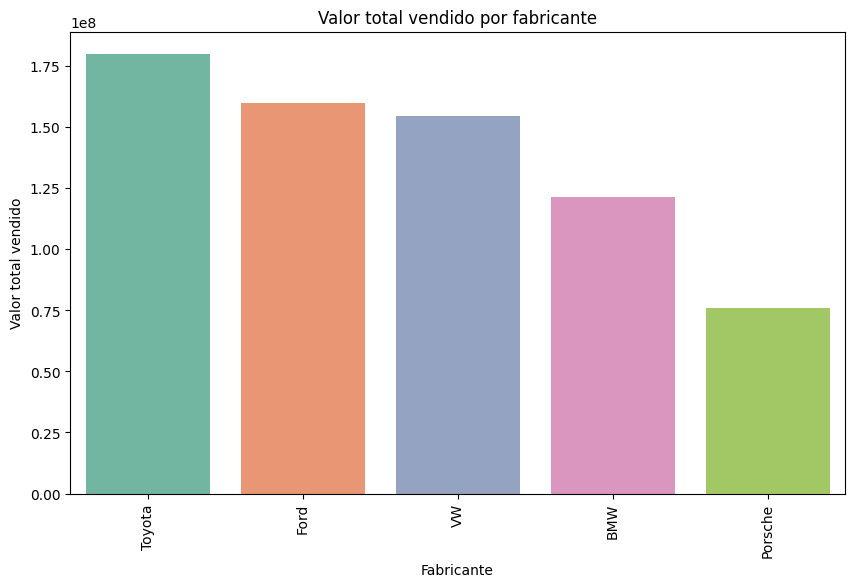

In [ ]:
#Graficos de barras com o valor total que cada marca vendeu.
plt.figure(figsize=(10,6))ns.barplot(x=df.groupby('Manufacturer')['Price'].sum().sort_values(ascending=False).index, y=df.groupby('Manufacturer')['Price'].sum().sort_values(ascending=False), palette='Set2')
plt.title('Valor total vendido por fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Valor total vendido')
plt.xticks(rotation=90)
plt.show()

/tmp/ipython-input-3153865124.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False).index, y=df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False), palette='Set1')


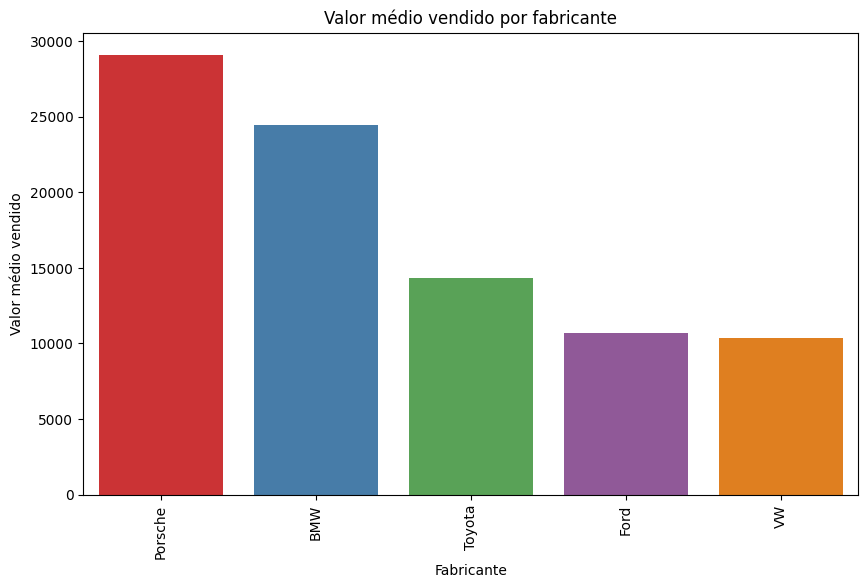

In [ ]:
#Grafico para valor medio de vendas de cada fabricante
plt.figure(figsize=(10,6))
sns.barplot(x=df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False).index, y=df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False), palette='Set1')
plt.title('Valor médio vendido por fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Valor médio vendido')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Frequência')

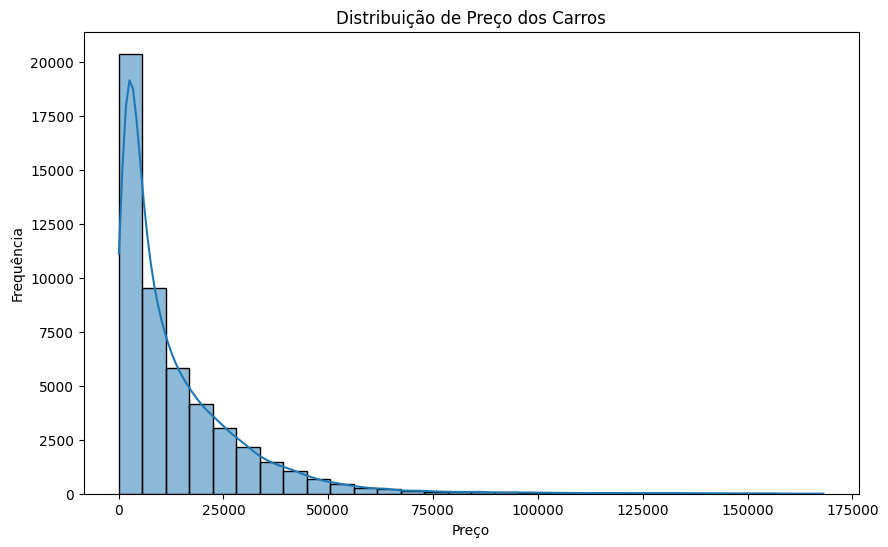

In [ ]:
# Grafico para distruibuição de preço dos carros
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribuição de Preço dos Carros')
plt.xlabel('Preço')
plt.ylabel('Frequência')

Text(0.5, 0, 'Kilometragem')

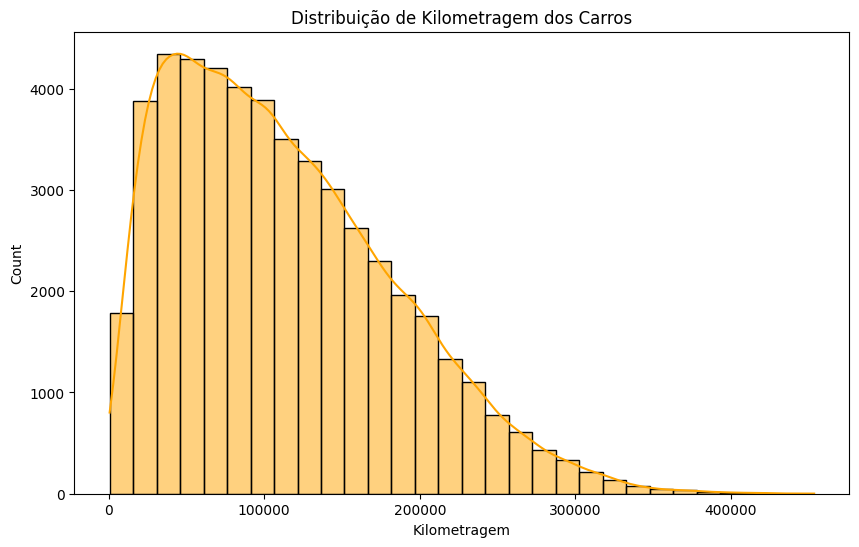

In [ ]:
# Grafico para distruibuição de kilometragem dos carros
plt.figure(figsize=(10, 6))
sns.histplot(df['Mileage'], bins=30, kde=True, color='Orange')
plt.title('Distribuição de Kilometragem dos Carros')
plt.xlabel('Kilometragem')

/tmp/ipython-input-200543296.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Fuel type", palette="Set2")


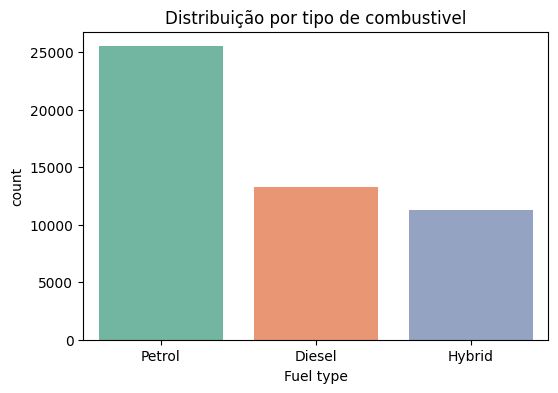

In [ ]:
#Graficos de barra por distruibição de tipo do combustivel
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Fuel type", palette="Set2")
plt.title("Distribuição por tipo de combustivel")
plt.show()

/tmp/ipython-input-3094105346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Year of manufacture", palette="coolwarm")


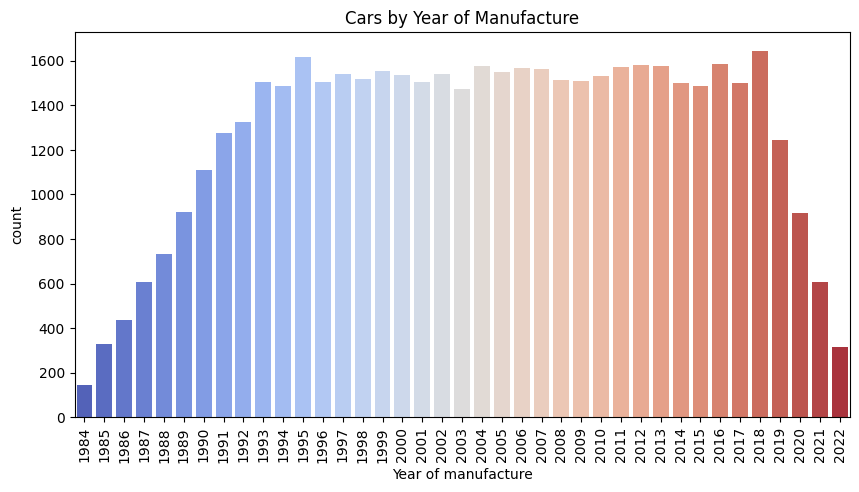

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Year of manufacture", palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Cars by Year of Manufacture")
plt.show()


/tmp/ipython-input-3284818870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Fuel type", y="Price", palette="Set2")


<Axes: xlabel='Fuel type', ylabel='Price'>

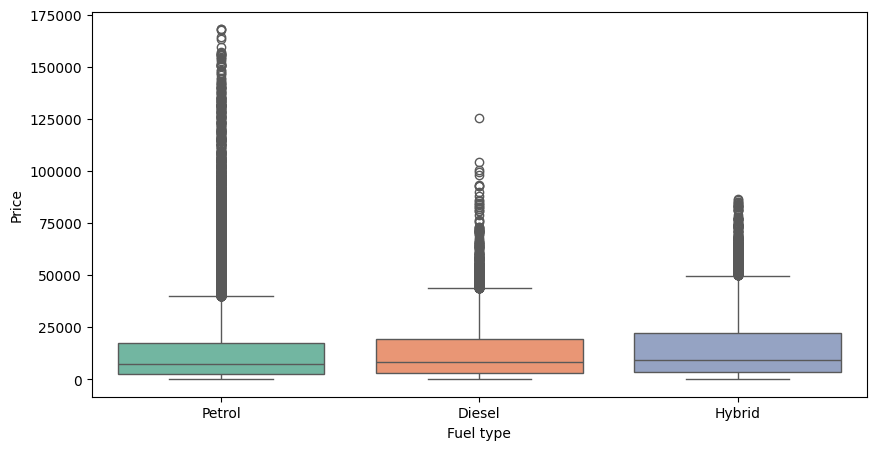

In [ ]:
#Distribuição de preço por tipo de combustivel
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Fuel type", y="Price", palette="Set2")

Text(0.5, 1.0, 'Distribuição de Preço por Kilometragem')

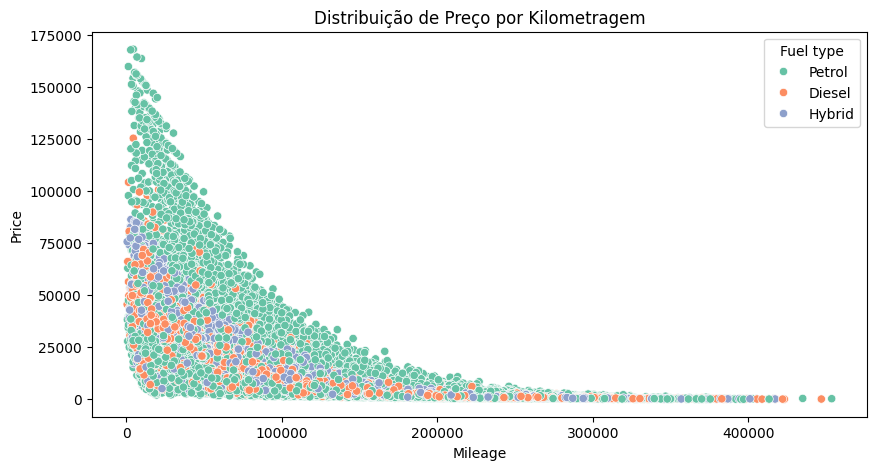

In [ ]:
#Distribuição de preço por kilometragem com boa visualização usando grafico de disperção
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Mileage", y="Price", hue="Fuel type", palette="Set2")
plt.title("Distribuição de Preço por Kilometragem")

#Finalização da analise inicial




1. A Toyota, com um preço médio mais elevado, consegue uma receita total maior que a Ford(12.77%) e a VW(16.49%), que competem em volume. Enquanto BMW e Porsche operam em um segmento de luxo com alto preço e baixo volume.







2. Existe uma clara correlação negativa entre quilometragem e preço, como esperado para carros usados.





3. Os carros Híbridos, por terem o maior preço médio, têm um volume de vendas menor comparado com carros a diesel e gasolina



